In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.interpolate import RectBivariateSpline, interp1d

Calculate likelihoods / chisq for a model containing a combination of photo-z uncertainty as a function of a mean shift to the redshift distribution for each source bin ($\Delta z$ A and B) and a single A_IA intrinsic alignment parameter across 1 and 2 halo scales.

Make plots.

In [47]:
# Note the first sigz point is not linearly spaced so should not really be used for plotting atm
delza = ([-0.2, -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1, -0.09, -0.08, -0.07, -0.06, 
          -0.05, -0.04, -0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 
         0.07, 0.08, 0.09, 0.1])

delzb = ([-0.2, -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11,-0.1, -0.09, -0.08, -0.07, -0.06, 
          -0.05, -0.04, -0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 
         0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2,  0.21, 0.22, 0.23, 
          0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4,
         0.41,0.42,0.43,0.44,0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51,0.52,0.53,0.54,0.55,0.56, 0.57, 0.58, 0.59, 0.6,
         0.61,0.62,0.63,0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 
          0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9])

sigz = [0,0]

AIA = ([-0.1, -0.08, -0.06, -0.04, -0.02, 0.0, 0.02, 0.04, 
        0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36])

In [48]:
# Load data vectors for each case and get the signal to noise.
# Load the covariance in order to do this
data_cov = np.load('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/CovMat.npy')
inv_data_cov = np.linalg.inv(data_cov)
gamma_IA_fid = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/GammaIA')
endfile = 'DESY1_wfidIA_measured-redshifts-wrong_variableF_DESHoD'

chisquared = np.zeros((len(delza), len(delzb), len(AIA)))
for ai in range(0,len(AIA)):
    for dia in range(0, len(delza)):
        for dib in range(0,len(delzb)):
            theta, data_vec = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_'+endfile+'_sigz=0.0_delzA='+str(delza[dia])+'_delzB='+str(delzb[dib])+'_Aia='+str(AIA[ai])+'.txt', unpack=True)
            diff = data_vec - gamma_IA_fid

            chisquared[dia, dib, ai] = np.dot(diff,np.dot(inv_data_cov,diff))
            
loglike = -0.5*chisquared

In [ ]:
# Plot one of the theory vectors in the 'decent fit' range alongside the data vector and covariance
# Just to make sure it looks okay

"""plt.figure()
theta, data_vec = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_'+endfile+'_sigz=0.0001_delz=0.09_Aia=0.12.txt', unpack=True)
plt.loglog(theta, data_vec, 'o')#, label='$\delta z$=0.07, $\sigma$=0.0')
plt.errorbar(theta, gamma_IA_fid, yerr = np.sqrt(np.diag(data_cov)), marker='o',ls='none',label='measurement')
plt.ylabel('$\gamma_{IA}(\\theta)$')
plt.xlabel('$\\theta$, arcmin')
#plt.title('w/ fid IA, perturb measured source redshift distributions \n + negative, o positive')
#plt.ylim(10**(-5),10**(-2))
plt.legend()
plt.yscale('log')
#plt.savefig('./perturb_measured_source_dNdzs_nofidIA_w1halo_variableF_Planck18paras.png')
#plt.close()
plt.show()"""

In [ ]:
# We want to look at a chi squared distribution with the correct number of degrees of freedom
# And calculate the probability that each of our photo-z uncertainty + A_IA models are drawn from this distribution.

To understand why we are seeing no apparent degeneracy between A_IA and the photo-z parameters, want to pick a relatively high likelihood value and plot each contribution.

In [9]:
min_loglike = np.amax(loglike)
ind_best = np.where(loglike==min_loglike)

In [10]:
# What is the chi squared for this?
DOF = len(gamma_IA_fid) - 2 # Fitting two parameters
bestfit_chi2 = chisquared[ind_best[0][0], ind_best[1][0], ind_best[2][0]]
bestfit_chi2_dof = bestfit_chi2/DOF

print('chi^2 / DOF at best fit=', bestfit_chi2_dof)

chi^2 / DOF at best fit= 0.6936008088636754


In [11]:
# Print the max likelihood values:
print('Max likelihood is at Delta z a=', delza[ind_best[0][0]], 'Delta z b=', delzb[ind_best[1][0]], 'AIA=', AIA[ind_best[2][0]])

Max likelihood is at Delta z a= -0.07 Delta z b= 0.29 AIA= 0.12


In [15]:
# The lensing contribution will be given by the gamma_IA with these pz parameters and AIA=0.
# And vice-versa for AIA:

theta_1, AIA_contr_bestfit = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_'+endfile+'_sigz=0.0_delzA=0_delzB=0_Aia=0.12.txt', unpack=True)
theta_2, pz_contr_bestfit = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_'+endfile+'_sigz=0.0_delzA=-0.07_delzB=0.29_Aia=0.0.txt', unpack=True)

In [16]:
# Jonathan's model contribution:
theta_3, gam_mod = np.loadtxt('./txtfiles/photo_z_test/mod_IA_nfw_plus_lin.txt', unpack=True)
AIA_Jon = 0.12*gam_mod

In [17]:
theta_4, finite_lens_contr = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_'+endfile+'_sigz=0.0_delzA=0_delzB=0_Aia=0.0.txt', unpack=True)

In [ ]:
# Load the lensing-only gamma_t to see if it has the right scale-dependence before dividing B-1+F
theta_5, gammat_a_lens = np.loadtxt('./txtfiles/photo_z_test/gammat_lens_A_'+endfile+'.dat', unpack=True)
theta_6, gammat_b_lens = np.loadtxt('./txtfiles/photo_z_test/gammat_lens_B_'+endfile+'.dat', unpack=True)

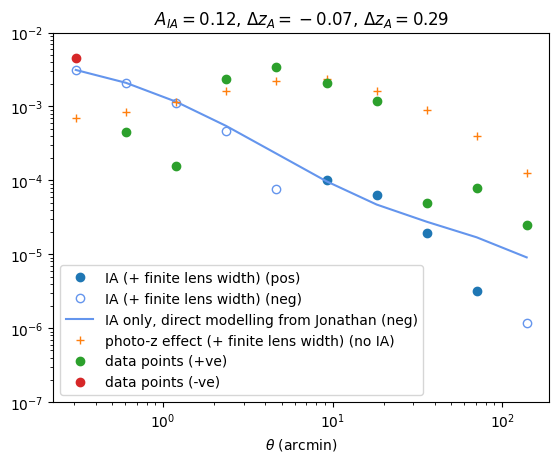

In [22]:
plt.figure()
plt.loglog(theta_1, AIA_contr_bestfit, 'o', label='IA (+ finite lens width) (pos)')
plt.loglog(theta_2, -AIA_contr_bestfit, 'o', color='#6495ED', label='IA (+ finite lens width) (neg)', fillstyle='none')
plt.loglog(theta_3, -AIA_Jon, color='#6495ED', label='IA only, direct modelling from Jonathan (neg)')
plt.loglog(theta_2, pz_contr_bestfit, '+', label='photo-z effect (+ finite lens width) (no IA)')
#plt.loglog(theta_1, gamma_IA_fid, 'o',label='data points (+ve)')
#plt.loglog(theta_1, -gamma_IA_fid, 'o',label='data points (-ve)')
#plt.loglog(theta_4, AIA_Jon+finite_lens_contr, '+',color='m',markersize=16,label='IA model + finite lens width')
#plt.loglog(theta_4, -1.0*(AIA_Jon+finite_lens_contr),'x',color='m', markersize=16, label='IA model + finite lens width (neg)')
#plt.loglog(theta_5, gammat_a_lens, 'k', linestyle='--', label='lensing only, A')
#plt.loglog(theta_6, gammat_b_lens, 'k',linestyle=':', label='lensing only, B')
plt.ylim(10**(-7), 10**(-2))
plt.title('$A_{IA}=0.12$, $\Delta z_A = -0.07$, $\Delta z_A =0.29$')
plt.xlabel('$\\theta$ (arcmin)')
plt.legend()
#plt.savefig('./compare_terms.pdf')
plt.show()

In [23]:
theta_full, full_best_fit = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_'+endfile+'_sigz=0.0_delzA=-0.07_delzB=0.29_Aia=0.12.txt', unpack=True)

In [27]:
np.diag(data_cov)#data_cov.shape

array([3.48098205e-06, 2.05324395e-06, 1.69285776e-06, 1.99163778e-06,
       2.37243958e-06, 1.23778223e-06, 5.87276820e-07, 3.38917193e-07,
       1.24946018e-07, 5.74410342e-08])

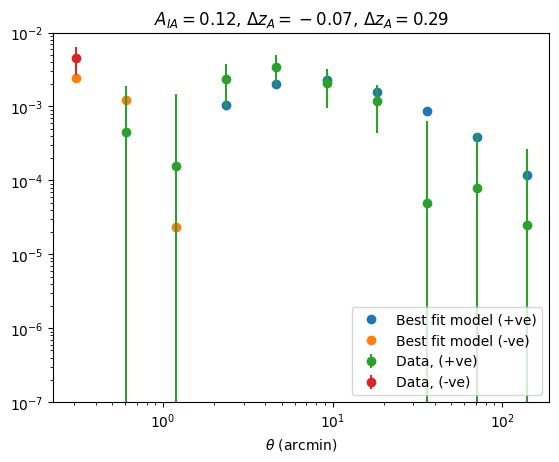

In [34]:
plt.figure()
plt.loglog(theta_full, full_best_fit, 'o', label='Best fit model (+ve)')
plt.loglog(theta_full, -full_best_fit, 'o', label='Best fit model (-ve)')
plt.errorbar(theta_full, gamma_IA_fid, yerr= np.sqrt(np.diag(data_cov)), fmt='o',label='Data, (+ve)')
plt.errorbar([theta_full[0]], [-gamma_IA_fid[0]], yerr= np.sqrt(np.diag(data_cov))[0], fmt='o',label='Data, (-ve)')
plt.ylim(10**(-7), 10**(-2))
plt.yscale('log')
plt.title('$A_{IA}=0.12$, $\Delta z_A = -0.07$, $\Delta z_A =0.29$')
plt.xlabel('$\\theta$ (arcmin)')
plt.legend()
#plt.savefig('./compare_terms.pdf')
plt.show()

Okay, but what we would really like is a classic 'triangle plot' for the 3 parameters with marginalisation in each 2D plane over the not-shown parameter (and maybe 1D plots over both parameters not shown). Let us construct this. We follow the maths for this from the postprocess module of cosmosis.

In [49]:
# Get 2D marginalised distributions

# First normalise the log likelihood such that its peak value is 0
loglike_norm = loglike - np.amax(loglike)

# Now sum over the extra parameter in each 2D case. 
# This only works mathematically if you have sampled out to the edges of the distribution.

loglike_dza_dzb = np.zeros((len(delza), len(delzb)))
for zia in range(0,len(delza)):
    for zib in range(0,len(delzb)):
        loglike_dza_dzb[zia,zib] = np.log(np.sum(np.exp(loglike_norm[zia, zib,:])))
loglike_dza_dzb_norm = loglike_dza_dzb - np.amax(loglike_dza_dzb)
like_dza_dzb_norm = np.exp(loglike_dza_dzb_norm)

loglike_dza_aia = np.zeros((len(delza), len(AIA)))
for zi in range(0,len(delza)):
    for ai in range(0,len(AIA)):
        loglike_dza_aia[zi,ai] = np.log(np.sum(np.exp(loglike_norm[zi,:, ai])))
loglike_dza_aia_norm = loglike_dza_aia - np.amax(loglike_dza_aia)
like_dza_aia_norm = np.exp(loglike_dza_aia_norm)

loglike_dzb_aia = np.zeros((len(delzb), len(AIA)))
for zib in range(0,len(delzb)):
    for ai in range(0,len(AIA)):
        loglike_dzb_aia[zib,ai] = np.log(np.sum(np.exp(loglike_norm[:,zib, ai])))
loglike_dzb_aia_norm = loglike_dzb_aia - np.amax(loglike_dzb_aia)
like_dzb_aia_norm = np.exp(loglike_dzb_aia_norm)


/tmp/ipykernel_583874/423125680.py:12: RuntimeWarning: divide by zero encountered in log
  loglike_dza_dzb[zia,zib] = np.log(np.sum(np.exp(loglike_norm[zia, zib,:])))


In [50]:
# Now also get the 1_D dist for each.
# This only works mathematically if you have sampled out to the edges of the distribution.

loglike_dza = np.zeros((len(delza)))
for di in range(0,len(delza)):
    loglike_dza[di] = np.log(np.sum(np.exp(loglike_dza_aia_norm[di,:])))
loglike_dza_norm = loglike_dza - np.amax(loglike_dza)
like_dza = np.exp(loglike_dza_norm)

loglike_dzb = np.zeros((len(delzb)))
for di in range(0,len(delzb)):
    loglike_dzb[di] = np.log(np.sum(np.exp(loglike_dzb_aia_norm[di,:])))
loglike_dzb_norm = loglike_dzb - np.amax(loglike_dzb)
like_dzb = np.exp(loglike_dzb_norm)

loglike_AIA = np.zeros((len(AIA)))
for ai in range(0,len(AIA)):
    loglike_AIA[ai] = np.log(np.sum(np.exp(loglike_dza_aia_norm[:,ai])))
loglike_AIA_norm = loglike_AIA - np.amax(loglike_AIA)
like_AIA = np.exp(loglike_AIA_norm)

#loglike_dz_aia = np.zeros((len(delz), len(AIA)))
#for zi in range(0,len(delz)):
#    for ai in range(0,len(AIA)):
#        loglike_dz_aia[zi,ai] = np.log(np.sum(np.exp(loglike_norm[zi,:, ai])))
#loglike_dz_aia_norm = loglike_dz_aia - np.amax(loglike_dz_aia)
#like_dz_aia_norm = np.exp(loglike_dz_aia_norm)

#loglike_sigz_aia = np.zeros((len(sigz), len(AIA)))
#for si in range(0,len(sigz)):
#    for ai in range(0,len(AIA)):
#        loglike_sigz_aia[si,ai] = np.log(np.sum(np.exp(loglike_norm[:,si, ai])))
#loglike_sigz_aia_norm = loglike_sigz_aia - np.amax(loglike_sigz_aia)
#like_sigz_aia_norm = np.exp(loglike_sigz_aia_norm)

In [ ]:
plt.figure()
plt.plot(AIA, like_AIA)
plt.show()

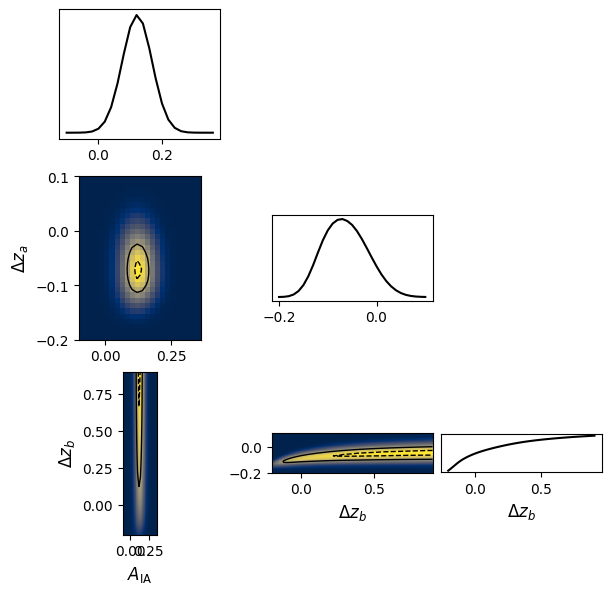

In [51]:
colorbar_info = plt.cm.ScalarMappable(cmap='cividis')
# Now make these into a triangle plot
fig, axs = plt.subplots(3, 3,figsize=[6,6], layout="constrained")
fig.delaxes(axs[0][1])
fig.delaxes(axs[0][2])
fig.delaxes(axs[1][2])
axs[0,0].plot(AIA, like_AIA, color='k')
axs[0,0].set_yticks([])
axs[0,0].set_aspect(0.37)
axs[0,0].tick_params(labelsize=10)
axs[1, 0].imshow(like_dza_aia_norm, origin='lower', extent = [-0.1,0.36, -0.2,0.1], aspect=3.7/1.8, cmap='cividis')
#axs[0,0].set_xlabel('$AIA$', fontsize=16)
axs[1,0].set_ylabel('$\Delta z_a$', fontsize=12)
axs[1,0].contour(AIA,delza,  like_dza_aia_norm, [0.68,0.95], linestyles=['solid','dashed'],colors='k', linewidths=1)
axs[1,0].tick_params(labelsize=10)
axs[1,1].plot(delza, like_dza, color='k')
axs[1,1].set_yticks([])
axs[1,1].set_aspect(0.16)
axs[1,1].tick_params(labelsize=10)
axs[2, 0].imshow(like_dzb_aia_norm, origin='lower',extent = [-0.1,0.36,-0.2, 0.9], aspect=2, cmap='cividis')
axs[2,0].set_xlabel('$A_{\\rm IA}$', fontsize=12)
axs[2,0].set_ylabel('$\Delta z_b$', fontsize=12)
axs[2,0].contour(AIA,delzb,  like_dzb_aia_norm, [0.68,0.95], linestyles=['solid','dashed'],colors='k', linewidths=1)
axs[2,0].tick_params(labelsize=10)
axs[2,1].imshow(like_dza_dzb_norm, extent = [-0.2, 0.9,-0.2,0.1], origin='lower', aspect=0.9, cmap='cividis')
axs[2,1].set_xlabel('$\Delta z_b$', fontsize=12)
#axs[1,1].set_ylabel('$\Delta z$', fontsize=16)
axs[2,1].contour(delzb,delza,  like_dza_dzb_norm, [0.68,0.95], linestyles=['solid','dashed'],colors='k', linewidths=1)
axs[2,1].tick_params(labelsize=10)
axs[2,2].plot(delzb, like_dzb, color='k')
axs[2,2].set_yticks([])
axs[2,2].set_aspect(0.3)
axs[2,2].set_xlabel('$\Delta z_b $', fontsize=12)
axs[1,1].tick_params(labelsize=10)
#plt.constrained_layout('True')
#plt.tight_layout()
#plt.savefig('./triangle_plot_full_distributions_priors.pdf')
plt.show()


In [ ]:
# Interpolate to get smoothe contours

# 2D

plot_sigz_ai = like_sigz_aia_norm[0:6,5:16]
sigz_ai_spline = RectBivariateSpline(sigz[0:6], AIA[5:16], plot_sigz_ai)

sigz_plot = np.linspace(0, 0.05, 100)
AIA_plot = np.linspace(0,0.2, 100)
sigz_ai_smooth = np.zeros((len(sigz_plot), len(AIA_plot)))
for si in range(0,len(sigz_plot)):
    for ai in range(0,len(AIA_plot)):
        sigz_ai_smooth[si,ai] = sigz_ai_spline.ev(sigz_plot[si], AIA_plot[ai])

plot_dz_ai =like_dz_aia_norm[0:31,5:16]
dz_ai_spline = RectBivariateSpline(delz[0:31], AIA[5:16], plot_dz_ai)

delz_plot = np.linspace(0, 0.3, 100)
delz_ai_smooth = np.zeros((len(delz_plot), len(AIA_plot)))
for di in range(0,len(delz_plot)):
    for ai in range(0,len(AIA_plot)):
        delz_ai_smooth[di,ai] = dz_ai_spline.ev(delz_plot[di], AIA_plot[ai])

plot_dz_sigz =like_dz_sigz_norm[0:31,0:6]
dz_sigz_spline = RectBivariateSpline(delz[0:31], sigz[0:6], plot_dz_sigz)

delz_sigz_smooth = np.zeros((len(delz_plot), len(sigz_plot)))
for di in range(0,len(delz_plot)):
    for si in range(0,len(sigz_plot)):
        delz_sigz_smooth[di,si] = dz_sigz_spline.ev(delz_plot[di], sigz_plot[si])

In [ ]:
# 1D:

delz_spline = interp1d(delz, like_dz)
delz_smooth = delz_spline(delz_plot)

ai_spline = interp1d(AIA, like_AIA)
ai_smooth = ai_spline(AIA_plot)

sigz_plot_1D = np.linspace(0.0001, 0.05,100)
sigz_spline = interp1d(sigz, like_sigz)
sigz_smooth = sigz_spline(sigz_plot_1D)

In [ ]:
sigz_ai_smooth.shape

In [ ]:
colorbar_info = plt.cm.ScalarMappable(cmap='cividis')
# Now actually make these into a triangle plot
fig, axs = plt.subplots(3, 3,figsize=[6,6], layout="constrained")
fig.delaxes(axs[0][1])
fig.delaxes(axs[0][2])
fig.delaxes(axs[1][2])
axs[0,0].plot(AIA_plot, ai_smooth, color='k')
axs[0,0].set_yticks([])
axs[0,0].set_aspect(0.2)
axs[0,0].tick_params(labelsize=10)
axs[1,0].imshow(sigz_ai_smooth, origin='lower', extent = [0.0, 0.2, 0.0,0.05], aspect=4.0, cmap='cividis')#, interpolation='spline36')
axs[1,0].set_ylabel('$\sigma_z$', fontsize=16)
axs[1,0].contour(AIA_plot,sigz_plot, sigz_ai_smooth, [0.68,0.95], linestyles=['solid','dashed'],colors='k', linewidths=1)
axs[1,0].tick_params(labelsize=10)
axs[1,1].plot(sigz_plot_1D, sigz_smooth, color='k')
axs[1,1].set_yticks([])
axs[1,1].set_aspect(0.05/0.4)
axs[1,1].tick_params(labelsize=10)
axs[2, 0].imshow(delz_ai_smooth, origin='lower',extent = [0.0,0.2,0.0, 0.3], aspect=0.66667, cmap='cividis',  interpolation='spline36')
axs[2,0].set_xlabel('$A_{\\rm IA}$', fontsize=12)
axs[2,0].set_ylabel('$\Delta z$', fontsize=12)
axs[2,0].contour(AIA_plot,delz_plot, delz_ai_smooth, [0.68,0.95], linestyles=['solid','dashed'],colors='k', linewidths=1)
axs[2,0].tick_params(labelsize=10)
axs[2,1].imshow(delz_sigz_smooth, extent = [0,0.05,0.0,0.3], origin='lower', aspect=5./30., cmap='cividis', interpolation='spline36')
axs[2,1].set_xlabel('$\sigma_z$', fontsize=12)
#axs[1,1].set_ylabel('$\Delta z$', fontsize=16)
axs[2,1].contour(sigz_plot,delz_plot,  delz_sigz_smooth, [0.68,0.95], linestyles=['solid','dashed'],colors='k', linewidths=1)
axs[2,1].tick_params(labelsize=10)
axs[2,2].plot(delz_plot, delz_smooth, color='k')
#axs[2,2].set_yticks([])
axs[2,2].set_aspect(0.3)
axs[2,2].set_xlabel('$\Delta z$', fontsize=12)
#plt.tight_layout()
plt.savefig('./triangle_plot_cutout_smoothed.pdf')

In [ ]:
(52+55)/2.

In [ ]:
like_dz_aia_norm[-1,:]

In [ ]:
like_dz_sigz_norm[10,:]